# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#from api_keys import api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a6f07cc875d0b5297ab18492569b9acd" #+ api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | punta arenas
Processing Record 2 | busselton
Processing Record 3 | hithadhoo
Processing Record 4 | samusu
City samusu not found. Skipping to next city.
Processing Record 5 | puerto colombia
Processing Record 6 | omsukchan
Processing Record 7 | saskylakh
Processing Record 8 | east london
Processing Record 9 | mataura
Processing Record 10 | bluff
Processing Record 11 | arraial do cabo
Processing Record 12 | hermanus
Processing Record 13 | geraldton
Processing Record 14 | sentyabrskiy
City sentyabrskiy not found. Skipping to next city.
Processing Record 15 | tarko-sale
Processing Record 16 | hobart
Processing Record 17 | mys shmidta
City mys shmidta not found. Skipping to next city.
Processing Record 18 | savino
Processing Record 19 | yellowknife
Processing Record 20 | rikitea
Processing Record 21 | ushuaia
Processing Record 22 | amderma
City amderma not found. Skipping to next city.
Processing Record 23 | v

Processing Record 215 | srednekolymsk
Processing Record 216 | carutapera
Processing Record 217 | port elizabeth
Processing Record 218 | medea
Processing Record 219 | yuci
Processing Record 220 | betanzos
Processing Record 221 | bethel
Processing Record 222 | atbasar
Processing Record 223 | tabialan
City tabialan not found. Skipping to next city.
Processing Record 224 | paulo afonso
Processing Record 225 | farah
Processing Record 226 | dalbandin
Processing Record 227 | ampanihy
Processing Record 228 | kazalinsk
City kazalinsk not found. Skipping to next city.
Processing Record 229 | nioaque
Processing Record 230 | lagoa
Processing Record 231 | beidao
Processing Record 232 | kaoma
Processing Record 233 | zaozerne
Processing Record 234 | kahului
Processing Record 235 | upernavik
Processing Record 236 | kawana waters
City kawana waters not found. Skipping to next city.
Processing Record 237 | qasigiannguit
Processing Record 238 | the valley
Processing Record 239 | indianola
Processing Reco

Processing Record 443 | kamaishi
Processing Record 444 | prince rupert
Processing Record 445 | severobaykalsk
Processing Record 446 | tasbuget
City tasbuget not found. Skipping to next city.
Processing Record 447 | pasighat
Processing Record 448 | labuhan
Processing Record 449 | tautira
Processing Record 450 | berlevag
Processing Record 451 | birao
Processing Record 452 | bo rai
Processing Record 453 | shimoda
Processing Record 454 | caravelas
Processing Record 455 | avera
Processing Record 456 | humaita
Processing Record 457 | chililabombwe
Processing Record 458 | bayir
Processing Record 459 | zharkent
Processing Record 460 | pochutla
Processing Record 461 | ust-maya
Processing Record 462 | ambon
Processing Record 463 | sorland
Processing Record 464 | yagodnoye
Processing Record 465 | coquimbo
Processing Record 466 | coihaique
Processing Record 467 | puerto suarez
Processing Record 468 | san rafael
Processing Record 469 | umm kaddadah
Processing Record 470 | saldanha
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [ ]:
city_data_pd.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

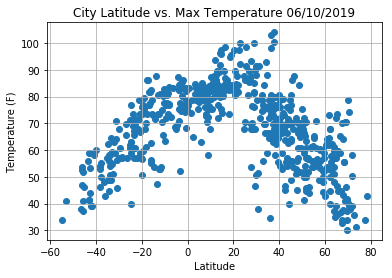

In [10]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, max_temps)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")

# Save the figure
plt.savefig("output_data-Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

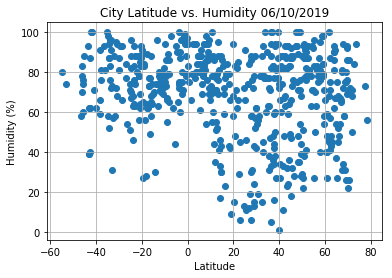

In [7]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, humidity)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

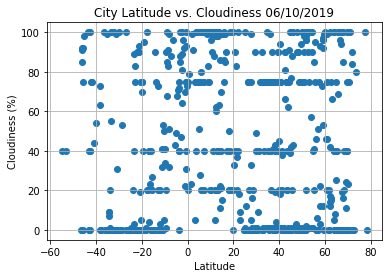

In [8]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

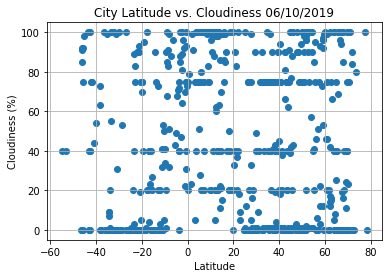

In [9]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()
